#### Setting up the notebook for our code.

In [200]:
#Import the libraries needed for this code.
import numpy as np
import matplotlib.pyplot as plt

#Some style code to control figure style.
import matplotlib.style
import matplotlib as mpl

mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150

# Defining the polynomial function
______________________________________

First we try to recreate the equation: $$y(x)=\sum_0^i\theta_{i}x^i$$
We do this by defining a function which **takes an array of x-values**, **an array of $\theta$ parameters** and **a $\sigma$ value** as input, returning us the corresponding array for $y(x)$. 


Since noise is added to the $y(x)$ array, we use the $\sigma$ value to generate noise with $\sigma$ standard distribution. 

In [201]:
def polyModelWithNoise(x,theta,sigma):
    """
       This function calculates the polynomial described in the markdown cell above with the inputs:
       
       x:     an array of x-values
       theta: an array theta parameters
       sigma: single-value, this is the standard deviation of the noise applied to the function
       _____________________________________________________________________________________________
       
       This function returns:
       
       y(x):  an array of values, array has the same size as x's array.  
       
    """
    #Setting up the size of theta-array into a name.    
    size = len(theta)   
    
    #Initialising i and y for the for-loop.
    i = 0                                  
    y = 0
    
    
    #Setting up a for-loop that calculates the value of (theta)*(x**i) for a value of i and adding it to the previous values
    #recorded in y until all theta parameters, and subsequently all i-values, are exhausted.
    
    for i in range(size):
        y += theta[i]*(x**i)
    
    #Generating a noise array with standard deviation equal to the defined sigma-value and adding to the y-values calculated.
    #The noise-array has a mean-value of 0 (to have a net zero effect to the data overall) and the same size as the x-array.
    noise = np.random.normal(0,sigma,len(x))
    y += noise
    
    
    return y


___
Next, we plot the 'polyModelWithNoise' function. 

x is defined as 100 equidistant values between 0 and 1. 
$\theta$ is defined as an array of [0,2]. 
$\sigma$ is given the value of 0.5

Text(0, 0.5, 'y(x)')

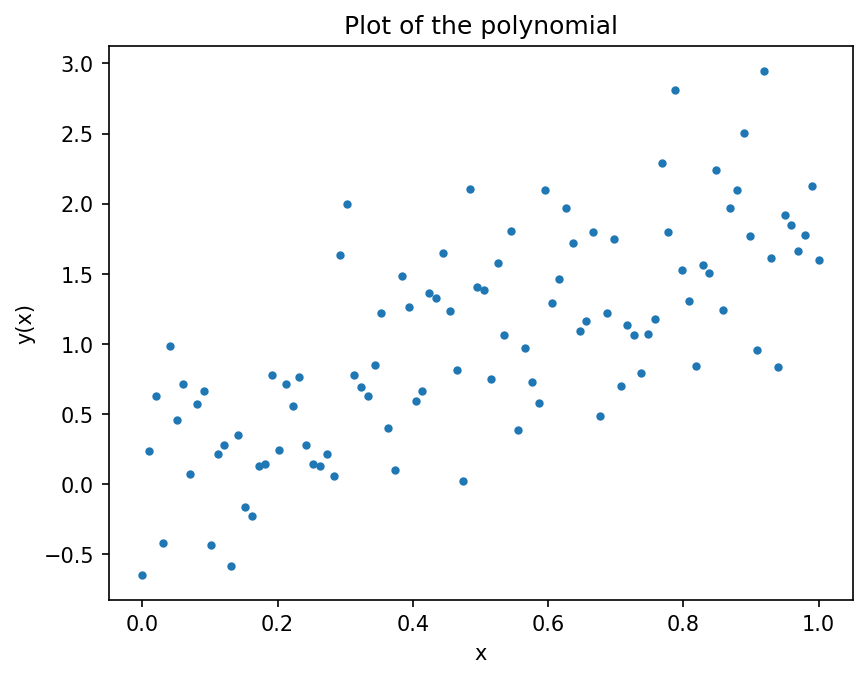

In [202]:
#Setting the values that will go into the polyModelWithNoise function.
theta = np.array([0,2])
x = np.linspace(0,1,100)
sigma = 0.5

#Calling the function and storing it in a variable.
P=polyModelWithNoise(x,theta,sigma)

#Plot the polynomial against x.
plt.plot(x,P,".")

#Label the graph and its axes.
plt.title("Plot of the polynomial")
plt.xlabel("x")
plt.ylabel("y(x)")


# Defining the polynomial-gradient function
______________________________________

We want to define a function that returns to us the derivative of the polynomial function above. Looking at the equation $$y(x)=\sum_0^i\theta_{i}x^i$$
we see that $\frac{\text{d}y(x)}{\text{d}\theta_i}$ has effect of dropping out the $\theta_i$ term from the equation above, as it is first-order. Thus
$$\frac{\text{d}y(x)}{\text{d}\theta_i} = x^i$$

We can see from this, that given an array of x of n-values, and an array of $\theta$ of m-values, the resulting array has m rows and n columns. Thus, array has m-dimensions. 

In [203]:
def polyGradient(x,theta):
    '''
       This function calculates the gradient of the polynomial y(x) with the inputs:
       
       x:     an array of x-values
       theta: an array theta parameters
       _____________________________________________________________________________
       
       This function returns:
       
       dy(x)/dtheta_i:  an array of values. if 100 x-values and 3 theta-values, array has shape 3x100.
    '''
    #Storing the size of theta-array and x-array into variables.   
    size = len(theta)
    x_size = len(x)
    
    #Initialising i and dy_dtheta for the ensuing code. dy_dtheta is set as a zero-matrix of shape len(theta)*len(x) 
    i=0
    dy_dtheta = np.zeros((size,x_size))
    
    #For-loop calculates the gradient corresponding to each value of i for theta, and adding it to a row in dy_dtheta array.
    for i in range(size):
        dy_dtheta[i] = (x**i)   #assigns x^i array to a row in dy_dtheta, with each i-value getting its own row. 
    
    return dy_dtheta

___
Next, we calculate the array given by the gradient function. This helps us check if the function is performing as expected.

As before:

x is defined as 100 equidistant values between 0 and 1. 
$\theta$ is defined as an array of [0,2]. 
$\sigma$ is given the value of 0.5

In [204]:
#Set the parameters
theta = np.array([0,2])
x = np.linspace(0,1,100)

#Calculate the gradient and store it in a variable.
GradientP = polyGradient(x,theta)

#Display the gradient's values.
GradientP

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

This result is expected as first row is full of 1, as expected when x^i, i=0. The second row is linear, as is expected, since for the second row, $$\frac{\text{d}y(x)}{\text{d}\theta_1} = x^1$$ which is the same as $$\frac{\text{d}y(x)}{\text{d}\theta_i} = x$$

# Defining the Stochastic gradient-descent function
______________________________________

We want to define a function that starts with a random theta value and uses Stochastic gradient-descent to find a path to a goal theta value. The Chi-squared value of these two theta-values give an indication of how close the theta vallue is to the goal theta vaue. Thus, the function should return an array containing the changing Chi-squared values and an array of the changing theta values. 

In [205]:
#This cell takes a heavy amount of inspiration from Ryan's 'Week1_Curve Fitting' notebook. 

def StochGradDesc(x, theta_true, theta, sigma, numsteps, eta ):
    '''
    This function allows us to implement a stochastic gradient descent over data.
    
    Inputs:
            x: An array of randomly generated x-values with uniform distribution over a range. Default is 0 to 1.
            theta_true: The goal theta-value that is being reached by the algorithm.
            theta: The starting-value of theta. Has no noise for y(x) of it.
            sigma: The standard deviation associated with the noise added to the y(x) of theta_true.
            numsteps: The number of steps in the algorithm.
            eta: This is the learning rate, and it describes the size of step each time.
            
    Outputs: 
            chiSqArray: Stores the changing Chi-squared values.
            thetaArray: Stroes the changing theta values.
    '''

    chiSqArray=np.zeros(numSteps)  #Initialising array for plotting
    thetaArray=np.zeros((numSteps+1,len(theta)))  #Initialisign array for plotting 
    
    thetaArray[0]=theta #Setting the first index value of the theta-array to store the 'theta' value as it changes.


    for i in range(numSteps): #Loops the code until i=numsteps.
        
        #Get the Chi-squared value for the given theta and theta_true values
        chiSq=np.average((polyModelWithoutNoise(x,theta)-polyModelWithNoise(x,theta_true,sigma))**2) 
        
        #Storing the changing Chi-squared values into an array for plotting
        chiSqArray[i]=chiSq 
        
        #Calculate the difference between true-y(for theta_true) and y(for theta).
        #Here, y(x) of theta has no noise associated, so no sigma value. But, true y(x) has a sigma value.
        deviation=polyModelWithNoise(x,theta,0)-polyModelWithNoise(x,theta_true,sigma)
        
        #Calculate a possibly better theta-value. '-=' due to subtraction from theta-value.
        theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
        
        #Storing the changing Chi-squared values into an array.
        thetaArray[i+1]=theta
        
    return chiSqArray, thetaArray #Return the Chi-squared array and Theta array.

___
Next, we run the algorithm on the following values and plot the Chi-squared array.


x = random, uniform distribution of values between 0 and 1. <br> theta_true = [0,2] <br> theta = [-1,0.5] <br> sigma = 0.5 <br> numsteps = 100 <br> learnig rate(eta) = 0.5

Text(0.5, 1.0, 'Change in Chi-squared')

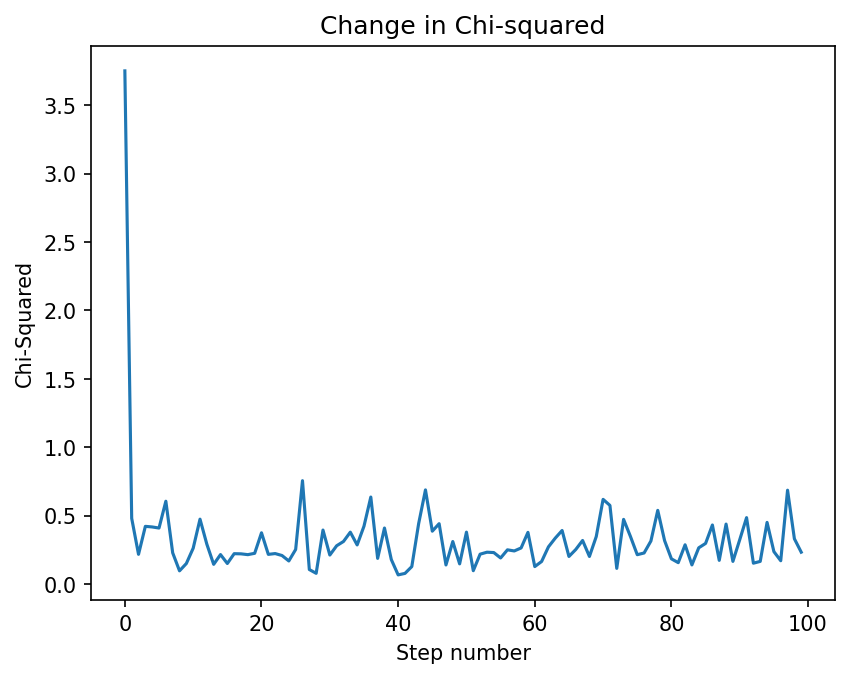

In [206]:
#Generate the random x-values.
x = np.random.uniform(0,1,10)

#Calculate the Chi-squared and Theta arrays, storing them in two variables.
chisqArray, thetaArray = StochGradDesc(x, ([0,2]), ([-1,0.5]), 0.5, 100, 0.5)

#Plot the Chi-squared values.
plt.plot(chisqArray)

#Label the graph and axes.
plt.xlabel("Step number")
plt.ylabel("Chi-Squared")
plt.title("Change in Chi-squared")

We can see from the graph above that the goal theta-value was reached in about 5 steps, with the algorithm randomly jumping around the goal value.

# Testing the algorithm with a Third-order Polynomial.
______________________________

We first start off by generating a plot of a third-order polynomial with: <br>     x = 100 evenly-spaced values between 0 and 1 <br>     $\theta$ = (0,2,2,2) <br>     $\sigma$ = 0.5

Text(0.5, 1.0, 'Plot of Third-order Polynomial')

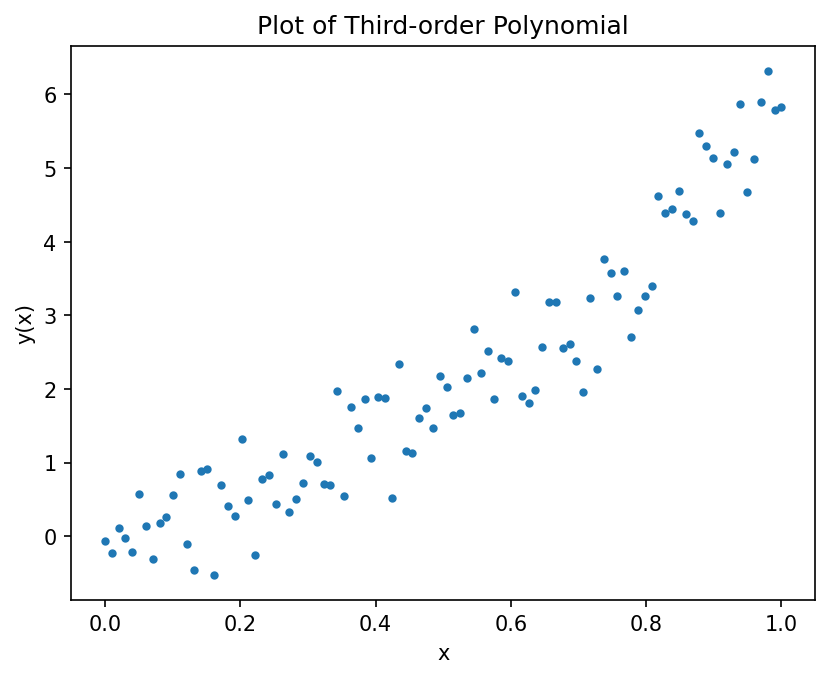

In [207]:
#Setting the x-array with a hundred evenly-spaced values between 0 and 1
x = np.linspace(0,1,100)

#Calculating the polynomial and storing the values in a variable.
P=polyModelWithNoise(x,([0,2,2,2]),0.5)

#Plotting the polynimial
plt.plot(x,P,".")

#Label the graph and axes.
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Plot of Third-order Polynomial")

### Now, we fit a First-order polynomial to this data, getting an optimized 1st-order theta-value using the gradient descent algorithm.

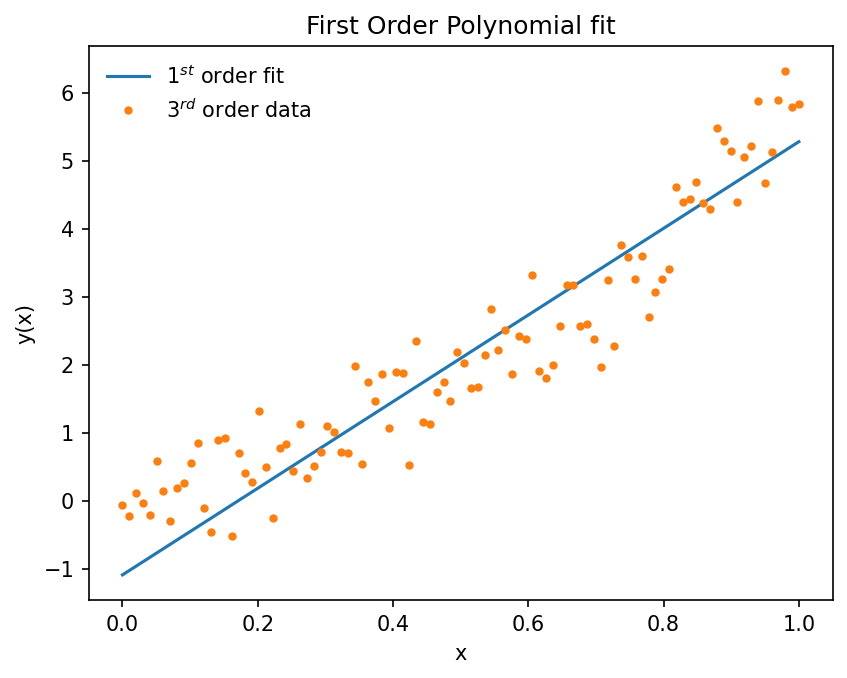

In [208]:
x = np.linspace(0,1,100) #Generate an equal-spaced x-array for plotting and generating the fit.

#Generate the random x-values.
x1 = np.random.uniform(0,1,10)

#Calculate the Chi-squared and Theta arrays, storing them in two variables.
chisqArray, thetaArray = StochGradDesc(x1, ([0,2,2,2]), ([1,0.5]), 0.5, 100, 0.5)

#Store the final theta value in thetaArray, using it to fit the first-order polynomial to the third-order data
theta1 = thetaArray[-1]

#Generate the first-order fit using the theta value calculated above.
FirstPolyFit = polyModelWithNoise(x,theta1,0)

#Plot the fit and the data.
plt.plot(x,FirstPolyFit,'-',label=r"$1^{st}$ order fit") 
plt.plot(x,P,'.',label=r"$3^{rd}$ order data")

#Label the graph and axes.
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("First Order Polynomial fit")

plt.legend() # Dislay the legend for graph

### Now, we fit a Third-order polynomial to this data, getting an optimized 3rd-order theta-value using the gradient descent algorithm.

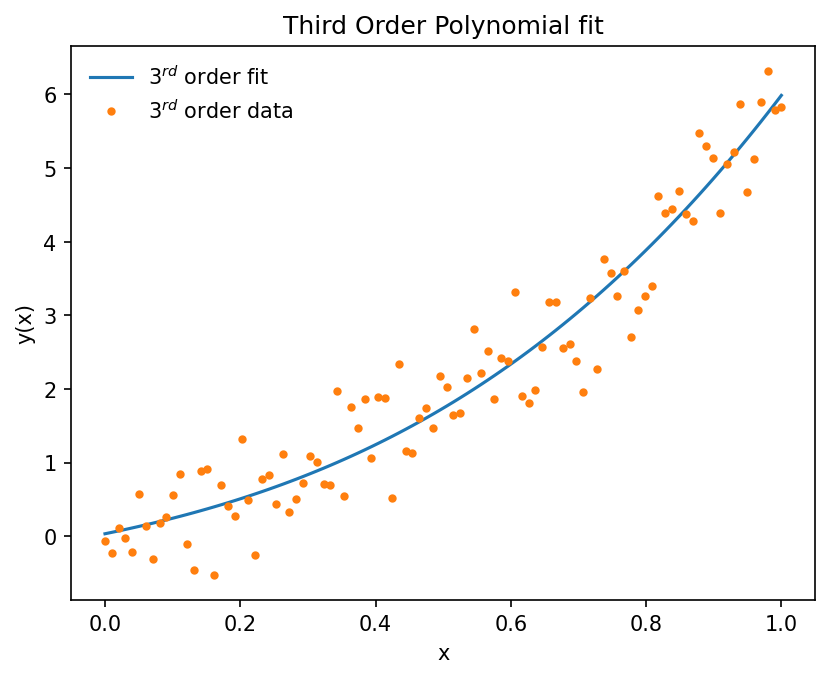

In [209]:
x = np.linspace(0,1,100) #Generate an equal-spaced x-array for plotting and generating the fit.

#Generate the random x-values.
x2 = np.random.uniform(0,1,10)

#Calculate the Chi-squared and Theta arrays, storing them in two variables.
chisqArray, thetaArray = StochGradDesc(x2, ([0,2,2,2]), ([1,0.5,0.5,0.5]), 0.5, 100, 0.5)

#Store the final theta value in thetaArray, using it to fit the first-order polynomial to the third-order data
theta3 = thetaArray[-1]

#Generate the first-order fit using the theta value calculated above.
ThirdPolyFit = polyModelWithNoise(x,theta3,0)

#Plot the fit and the data.
plt.plot(x,ThirdPolyFit,'-',label=r"$3^{rd}$ order fit") 
plt.plot(x,P,'.',label=r"$3^{rd}$ order data")

#Label the graph and axes.
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Third Order Polynomial fit")

plt.legend() # Dislay the legend for graph

### Finally, we fit a Seventh-order polynomial to this data, getting an optimized 7th-order theta-value using the gradient descent algorithm.

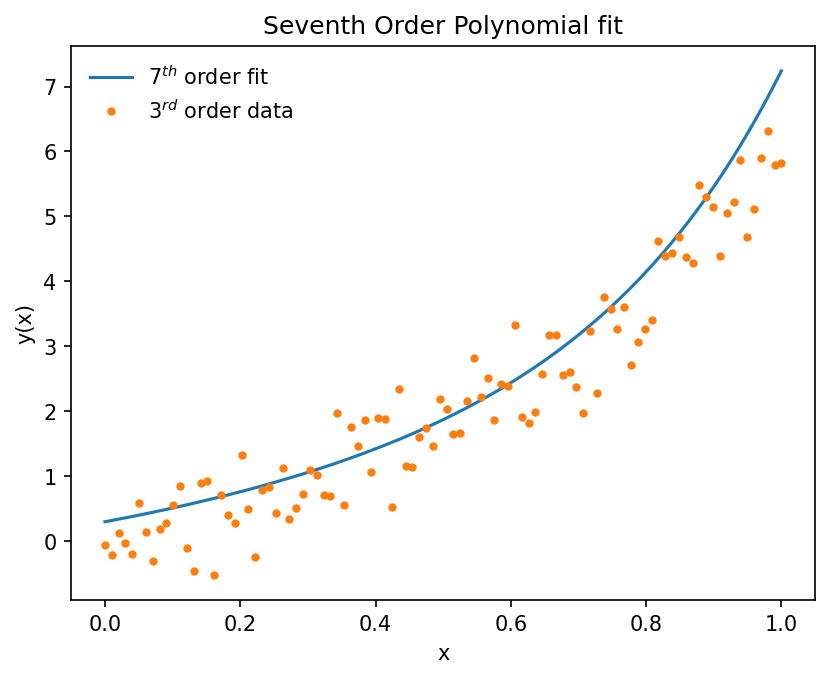

In [210]:
x = np.linspace(0,1,100) #Generate an equal-spaced x-array for plotting and generating the fit.

#Generate the random x-values.
x3 = np.random.uniform(0,1,10)

#Calculate the Chi-squared and Theta arrays, storing them in two variables.
chisqArray, thetaArray = StochGradDesc(x3, ([0,2,2,2]), ([1,0.5,0.5,0.5,0.5,0.5,0.5,0.5]), 0.5, 100, 0.5)

#Store the final theta value in thetaArray, using it to fit the first-order polynomial to the third-order data
theta7 = thetaArray[-1]

#Generate the first-order fit using the theta value calculated above.
SeventhPolyFit = polyModelWithNoise(x,theta7,0)

#Plot the fit and the data.
plt.plot(x,SeventhPolyFit,'-',label=r"$7^{th}$ order fit") 
plt.plot(x,P,'.',label=r"$3^{rd}$ order data")

#Label the graph and axes.
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Seventh Order Polynomial fit")

plt.legend() # Dislay the legend for graph

### Looking at the graphs above, we can see that the third-order fit does the best job of fitting the data.












.

# Checking the results over an extended region
_______
Now, we will be plotting the third order polynomial data (with noise) over a larger x-range of -0.5 to 1.5. Then we will use the three polynomial fit parametrs from above to see how weel they do over the extended regions.

Text(0.5, 1.0, 'Third-order Polynomial (extended)')

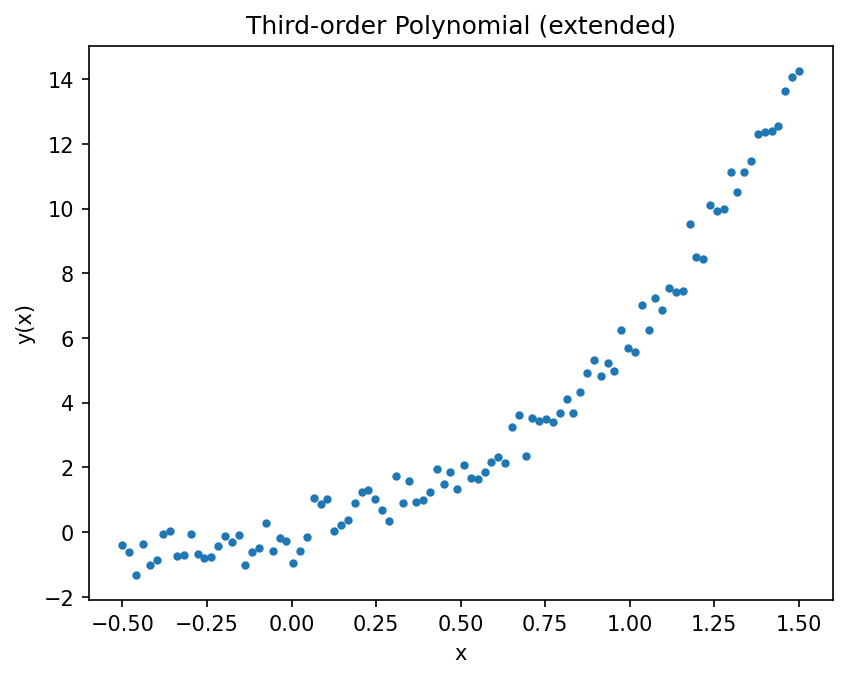

In [211]:
######################### First, we graph the Third-Order Polynomial data over the extended range of x ######################
x = np.linspace(-0.5,1.5,100)

P=polyModelWithNoise(x,[0,2,2,2],0.5)

plt.plot(x,P,".")

plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Third-order Polynomial (extended)")

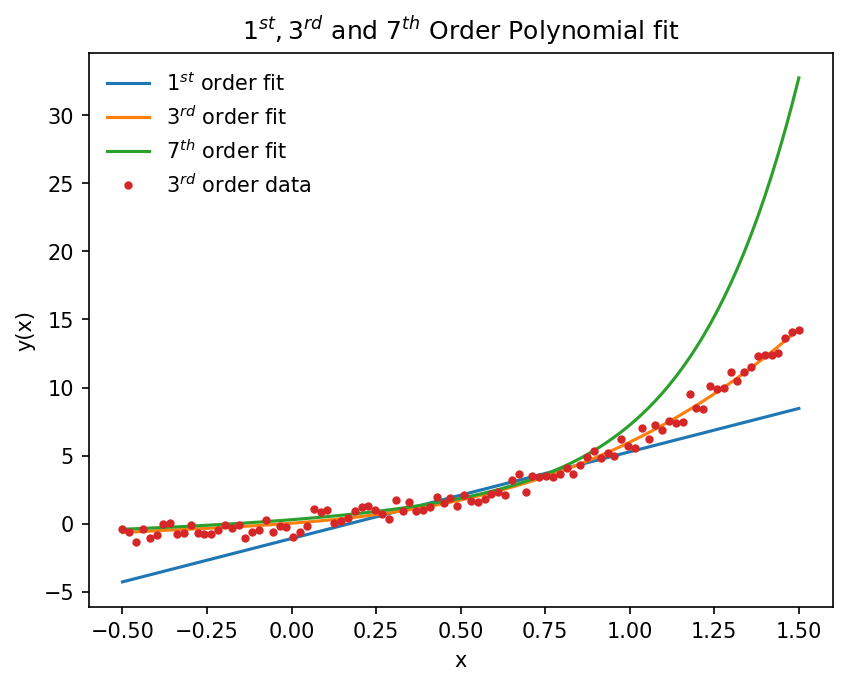

In [212]:
#Now, we generate the three polynomial fits and plot them against the third-order polynomial data.

x = np.linspace(-0.5,1.5,100) #Generate an equal-spaced x-array for plotting and generating the fit.

#Calculate the nth-order polynomial fits
FirstPolyFit = polyModelWithNoise(x,theta1,0)
ThirdPolyFit = polyModelWithNoise(x,theta3,0)
SeventhPolyFit = polyModelWithNoise(x,theta7,0)

#Plot the fit and the data.
plt.plot(x,FirstPolyFit,'-',label=r"$1^{st}$ order fit")
plt.plot(x,ThirdPolyFit,'-',label=r"$3^{rd}$ order fit")
plt.plot(x,SeventhPolyFit,'-',label=r"$7^{th}$ order fit") 
plt.plot(x,P,'.',label=r"$3^{rd}$ order data")

#Label the graph and axes.
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("$1^{st} ,3^{rd}$ and $7^{th}$ Order Polynomial fit")

plt.legend() # Dislay the legend for graph

### Again, looking at the graphs above, we can see that the third-order fit does the best job of fitting the data, even over the extended range.
